# XArray

The power of `pandas` for multi-dimensional arrays

http://xarray.pydata.org

Robin Wilson

@sciremotesense

robin@rtwilson.com

In [1]:
import datetime

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import xarray as xr

## Example

In [3]:
PM25 = xr.open_dataarray('/Users/robin/code/MAIACProcessing/All2014.nc')

In [4]:
PM25.shape

(181, 1162, 1240)

In [5]:
PM25.dims

('time', 'y', 'x')

In [6]:
seasonal = PM25.groupby('time.season').mean(dim='time')

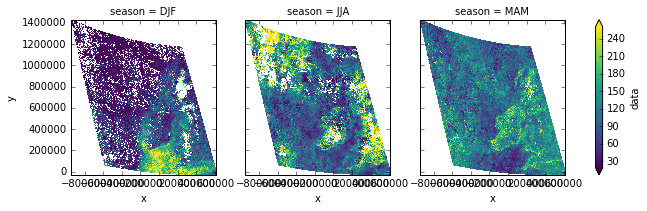

In [7]:
seasonal.plot.imshow(col='season', robust=True)

## Creating DataArrays

In [8]:
arr = np.random.rand(3, 4, 2)

In [9]:
xr.DataArray(arr)

<xarray.DataArray (dim_0: 3, dim_1: 4, dim_2: 2)>
array([[[ 0.40870867,  0.50774434],
        [ 0.95324548,  0.34963866],
        [ 0.08018721,  0.07358487],
        [ 0.29628633,  0.05846418]],

       [[ 0.25103556,  0.58376179],
        [ 0.79146793,  0.48717629],
        [ 0.79049545,  0.81341747],
        [ 0.82327339,  0.5918519 ]],

       [[ 0.09290842,  0.25878063],
        [ 0.60575924,  0.87921102],
        [ 0.25765875,  0.07778792],
        [ 0.73312085,  0.2323351 ]]])
Coordinates:
  * dim_0    (dim_0) int64 0 1 2
  * dim_1    (dim_1) int64 0 1 2 3
  * dim_2    (dim_2) int64 0 1

In [10]:
xr.DataArray(arr, dims=('x', 'y', 'time'))

<xarray.DataArray (x: 3, y: 4, time: 2)>
array([[[ 0.40870867,  0.50774434],
        [ 0.95324548,  0.34963866],
        [ 0.08018721,  0.07358487],
        [ 0.29628633,  0.05846418]],

       [[ 0.25103556,  0.58376179],
        [ 0.79146793,  0.48717629],
        [ 0.79049545,  0.81341747],
        [ 0.82327339,  0.5918519 ]],

       [[ 0.09290842,  0.25878063],
        [ 0.60575924,  0.87921102],
        [ 0.25765875,  0.07778792],
        [ 0.73312085,  0.2323351 ]]])
Coordinates:
  * x        (x) int64 0 1 2
  * y        (y) int64 0 1 2 3
  * time     (time) int64 0 1

In [11]:
da = xr.DataArray(arr,
                  dims=('x', 'y', 'time'),
                  coords={'x': [10, 20, 30],
                          'y': [0.3, 0.7, 1.3, 1.5],
                          'time': [datetime.datetime(2016, 3, 5),
                                   datetime.datetime(2016, 4, 7)]})

In [12]:
da

<xarray.DataArray (x: 3, y: 4, time: 2)>
array([[[ 0.40870867,  0.50774434],
        [ 0.95324548,  0.34963866],
        [ 0.08018721,  0.07358487],
        [ 0.29628633,  0.05846418]],

       [[ 0.25103556,  0.58376179],
        [ 0.79146793,  0.48717629],
        [ 0.79049545,  0.81341747],
        [ 0.82327339,  0.5918519 ]],

       [[ 0.09290842,  0.25878063],
        [ 0.60575924,  0.87921102],
        [ 0.25765875,  0.07778792],
        [ 0.73312085,  0.2323351 ]]])
Coordinates:
  * y        (y) float64 0.3 0.7 1.3 1.5
  * time     (time) datetime64[ns] 2016-03-05 2016-04-07
  * x        (x) int64 10 20 30

In [13]:
da.sel(time='2016-03-05')

<xarray.DataArray (x: 3, y: 4)>
array([[ 0.40870867,  0.95324548,  0.08018721,  0.29628633],
       [ 0.25103556,  0.79146793,  0.79049545,  0.82327339],
       [ 0.09290842,  0.60575924,  0.25765875,  0.73312085]])
Coordinates:
  * y        (y) float64 0.3 0.7 1.3 1.5
    time     datetime64[ns] 2016-03-05
  * x        (x) int64 10 20 30

In [14]:
da.isel(time=1)

<xarray.DataArray (x: 3, y: 4)>
array([[ 0.50774434,  0.34963866,  0.07358487,  0.05846418],
       [ 0.58376179,  0.48717629,  0.81341747,  0.5918519 ],
       [ 0.25878063,  0.87921102,  0.07778792,  0.2323351 ]])
Coordinates:
  * y        (y) float64 0.3 0.7 1.3 1.5
    time     datetime64[ns] 2016-04-07
  * x        (x) int64 10 20 30

In [15]:
da.sel(x=slice(0, 20))

<xarray.DataArray (x: 2, y: 4, time: 2)>
array([[[ 0.40870867,  0.50774434],
        [ 0.95324548,  0.34963866],
        [ 0.08018721,  0.07358487],
        [ 0.29628633,  0.05846418]],

       [[ 0.25103556,  0.58376179],
        [ 0.79146793,  0.48717629],
        [ 0.79049545,  0.81341747],
        [ 0.82327339,  0.5918519 ]]])
Coordinates:
  * y        (y) float64 0.3 0.7 1.3 1.5
  * time     (time) datetime64[ns] 2016-03-05 2016-04-07
  * x        (x) int64 10 20

In [16]:
da.mean(dim='time')

<xarray.DataArray (x: 3, y: 4)>
array([[ 0.45822651,  0.65144207,  0.07688604,  0.17737525],
       [ 0.41739867,  0.63932211,  0.80195646,  0.70756264],
       [ 0.17584453,  0.74248513,  0.16772333,  0.48272797]])
Coordinates:
  * y        (y) float64 0.3 0.7 1.3 1.5
  * x        (x) int64 10 20 30

In [17]:
da.mean(dim=['x', 'y'])

<xarray.DataArray (time: 2)>
array([ 0.50701227,  0.40947951])
Coordinates:
  * time     (time) datetime64[ns] 2016-03-05 2016-04-07

In [19]:
PM25.sel(time='2014').groupby('time.month').std(dim='time')

## And more...

- Built-in dask support for large datasets
  - `da = xr.open_mfdataset(filename, chunks={'time':10})`

- Multi-level indexing

- Time-series operations

- Pandas integration

`http://xarray.pydata.org`